<a href="https://colab.research.google.com/github/juan-holguin/Senales_Sistemas/blob/main/Parciales/Parcial2_SyS_2024_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####**Estudiantes: Juan Camilo Holguin - Juan Camilo Cardona**



##**Primer punto:**

Encuentre la expresión del espectro de Fourier (forma exponencial y trigonométrica) para la señal $x(t) = \left|A\cos\left(2\pi*Fo\right)\right|^2$, con $t\in [-1/2Fo, 1/2Fo]$. con A,Fo ∈ R+. Realice las simulaciones respectivas para graficar el espectro de Fourier del ejercicio 1 (magnitud
 y fase como diagrama de Bode en decibelios), y presente el error relativo y la señal reconstruida para N = {1,2,...,50}.

###**Solucion:**

Tenemos que:

$${\omega_0} = 2{\pi}F_0$$

$$x(t)=\left|A\cos\left(2{\pi}F_0t\right)\right|^2 = A^2\cos^2\left(2{\pi}F_0t\right) =  A^2\cos^2\left({\omega_0}t\right)$$


recordamos lo siguiente:

$$\cos^2(\theta) = \frac{1}{2}\left(1 + cos(2\theta)\right)$$

entonces:

$$x(t)= \left(\frac{A^2}{2}\right)\left(1 + \cos\left(2{\omega_0}t\right)\right)$$

Para la serie trigonometrica:

$$x(t)= a_0 + \sum_{n=1}^{N=50}{a_n\cos(n\omega_0 t) + b_n\sin(n\omega_0 t)}$$

donde:

$$a_0 = c_0 = \frac{1}{t_f-t_i}\int_{t_i}^{t_f}x(t)dt$$

$$a_n = \frac{2}{t_f-t_i}\int_{t_i}^{t_f}x(t)\cos(n\omega_0 t)dt$$

$$b_n = \frac{2}{t_f-t_i}\int_{t_i}^{t_f}x(t)\sin(n\omega_0 t)dt$$

Por lo tanto:

$T = {t_f-t_i} = \frac{1}{2F_0} - (-\frac{1}{2F_0}) = \frac{2}{2F_0}  $

$$T = \frac{1}{F_0}$$


**Simulamos la señal de entrada con ${F_0} = 10 (Hz)$ ,   $ A = 5$**

$$\boxed{x_0(t)= \left(\frac{5^2}{2}\right)\left(1 + \cos\left(2{\pi}(10)t\right)\right)}$$

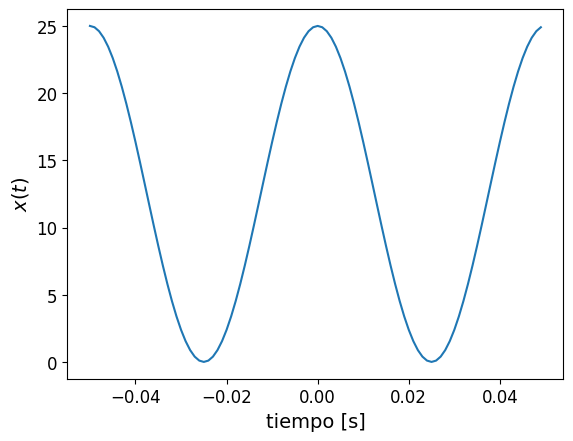

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# A ** 2 = Amplitud
A = 5
#Frecuencia fundamental (Hz)
Fo = 10
#Tiempo inicial
ti = -1/(2*Fo)
#Tiempo final
tf = 1/(2*Fo)
#Periodo
T = tf-ti
#Frecuencia angular
wo = 2*np.pi*Fo
#Frecuencia muestreo estrictamente mayor a 2*Fo
Fs = 100*Fo
tv = np.arange(ti,tf,1/Fs) #Vector de tiempo
Nm = len(tv) #Muestras en el tiempo
xo = ((A**2)/2)*(1 + np.cos(2*wo*tv)) #señal de entrada
plt.plot(tv,xo)
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()

##Dado que $x(t)$ presenta simetría par, $x(t)=x(-t)$:


 $$\boxed{b_n = 0 \quad \forall n \in \{1,\dots,50\}}$$

Así:

$$\boxed{x(t)= \left(\frac{A^2}{2} + \frac{A^2}{2}\cos\left(2{\omega_0}t\right)\right) =  a_0 + \sum_{n=1}^{N=50}{a_n\cos(n\omega_0 t)}}$$

.

##Calculamos $a_0$ que es quien condiciona el nivel DC de la señal.

$$a_0 = \frac{1}{\frac{1}{F_0}}\int_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}} \left(\frac{A^2}{2}\right)\left(1 + \cos\left(2{\omega_0}t\right)\right)dt$$

.

$$ a_0= \frac{A^2F_0}{2}\int_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}(1+cos(2{\omega_0}t))dt = \frac{A^2F_0}{2}\left(t\Big|_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}+\frac{sin(2{\omega_0}t)}{2{\omega_0}}\Big|_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}\right)$$

.

$$ a_0= \frac{A^2F_0}{2}\left(\frac{1}{2F_0}-\left(-\frac{1}{2F_0}\right)\right)+\frac{A^2F_0}{4{\omega_0}}\left(sin(2*2{\pi}F_0\left(\frac{1}{2F_0}\right))-sin(2*2{\pi}F_0\left(-\frac{1}{2F_0}\right))\right)$$

.

Simplificando la expresón, obtenemos:

$$a_0 =  \frac{A^2F_0}{2F_0} +  \frac{A^2F_0}{2}\left(2sin(2{\pi}\right)) $$

gracias a que la función seno es impar ($f(x)= -f(-x)$) obtuvimos $2sin(2{\pi})$, sin embargo, $sin(2{\pi}) = 0$, por lo tanto :

$$\boxed{a_0= \frac{A^2}{2}}$$

##por otra parte, está $a_n$ :

$$a_n = \frac{2}{\frac{1}{F_0}}\int_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}} \left(\frac{A^2}{2}\right)\left(1 + \cos\left(2{\omega_0}t\right)\right)(cos(n{\omega_0}t))dt$$

.

$$a_n = \frac{2}{\frac{1}{F_0}}\left(\frac{A^2}{2}\right)\int_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}cos(n{\omega_0}t)dt + \int_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}\left(\cos\left(2{\omega_0}t\right)\right)(cos(n{\omega_0}t))dt$$

recordando la identidad:

$cos(\alpha)*cos(\beta) = \frac{cos(\alpha+\beta)+cos(\alpha-\beta)}{2}$

.

$$a_n = \left(\frac{A^2F_0}{1}\right)\left(\left(\frac{sin(n2{\pi}F_0t)}{n2{\pi}F_0}\Big|_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}\right)+\left(\frac{sin(\left(n+2)(2{\pi}F_0t\right))}{2\left(n+2)(2{\pi}F_0\right)}\Big|_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}\right)+\left(\frac{sin(\left(n-2)(2{\pi}F_0t\right))}{2\left(n-2)(2{\pi}F_0\right)}\Big|_{\frac{-1}{2F_0}}^{\frac{1}{2F_0}}\right)\right)$$

.

después de evaluar y simplificar, obtenemos lo siguiente:

$$a_n = \left(\frac{A^2}{2{\pi}}\right)\left(\frac{2sin(n{\pi})}{n}+\frac{sin(\left(n+2){\pi}\right)}{(n+2)}+\frac{sin(\left(n-2){\pi}\right)}{(n-2)}\right)$$

.

Para $n\neq 0$ , $n\neq -2$y $n\neq 2$ , $a_n = 0.$ No obstante, para $n = 0$, $n = -2$ y $n = 2$ debemos calcular el límite y aproximar la indeterminación $\frac{0}{0}$:


$$a_0 = \frac{A^2}{2{\pi}}\lim_{n\to 0}\frac{\tfrac{d}{dn}\left[\sin(n\pi)\right]}{\tfrac{d}{dn}\left[n\right]} = \frac{A^2}{2{\pi}}\lim_{n\to 0}\frac{\cos(n\pi)(\pi)}{1}$$


$$\boxed{a_0= \frac{A^2}{2{\pi}}\left(\pi\right)= \frac{A^2}{2}}$$

.

$$a_2 = \frac{A^2}{2{\pi}}\lim_{n\to 2}\frac{\tfrac{d}{dn}\left[\sin((n-2)\pi)\right]}{\tfrac{d}{dn}\left[n-2\right]} = \frac{A^2}{2{\pi}}\lim_{n\to 2}\frac{\cos((n-2)\pi)(\pi)}{1} $$

$$a_2= \frac{A^2}{2{\pi}}(1)\left(\pi\right)= \frac{A^2}{2}$$

$$\boxed{a_2= \frac{A^2}{2}}$$

.

$$a_{-2} = \frac{A^2}{2{\pi}}\lim_{n\to -2}\frac{\tfrac{d}{dn}\left[\sin((n+2)\pi)\right]}{\tfrac{d}{dn}\left[n+2\right]} = \frac{A^2}{2{\pi}}\lim_{n\to- 2}\frac{\cos((n+2)\pi)(\pi)}{1} $$

$$a_2= \frac{A^2}{2{\pi}}(1)\left(\pi\right)= \frac{A^2}{2}$$

$$\boxed{a_{-2}= \frac{A^2}{2}}$$

por lo tanto:

$$\boxed{a_n = \left\{\begin{align} 0 & \quad \forall n \setminus \{-2,2\}\\
\frac{A^2}{2} & \quad n =  \{-2,2\}\\
\end{align}\right.}$$

$$\boxed{x(t) = a_0+\sum_{n=1}^{N}{a_n \sin(nt)} = a_0+b_2\cos(2{\omega_0t})=\frac{A^2}{2}+\frac{A^2}{2}\cos(2{\omega_0t})}$$

Para el caso de la serie exponencial compleja:

$$c_0 = a_0 = \frac{A^2}{2}$$

y

$$c_n = \frac{a_n - j b_n}{2}$$

Entonces:
$$\boxed{c_n = \left\{\begin{align}
\frac{A^2}{4} & \quad n = \{-2,2\}\\
\frac{A^2}{2} & \quad n = 0\\
0 & \quad \forall n \setminus \{-2,0,2\}
\end{align}\right.}$$

y

$$\boxed{x(t) = \sum_{n=-N}^{N}{c_n e^{j n t}}}$$


$$x(t) = c_{-2}e^{-j2t} + c_{0}e^{0} + c_{2}e^{j2t}$$

$$x(t)= \frac{A^2}{4}(\cos(2{\omega_0t})-j\sin(2{\omega_0t}))+\frac{A^2}{2}+\frac{A^2}{4}(\cos(2{\omega_0t})+j\sin(2{\omega_0t})) $$

Se cancela la función seno y nos queda:

$$\boxed{x(t) = \frac{2A^2}{4}\cos(2{\omega_0t})+\frac{A^2}{2}=\frac{A^2}{2}+\frac{A^2}{2}\cos(2{\omega_0t})}$$

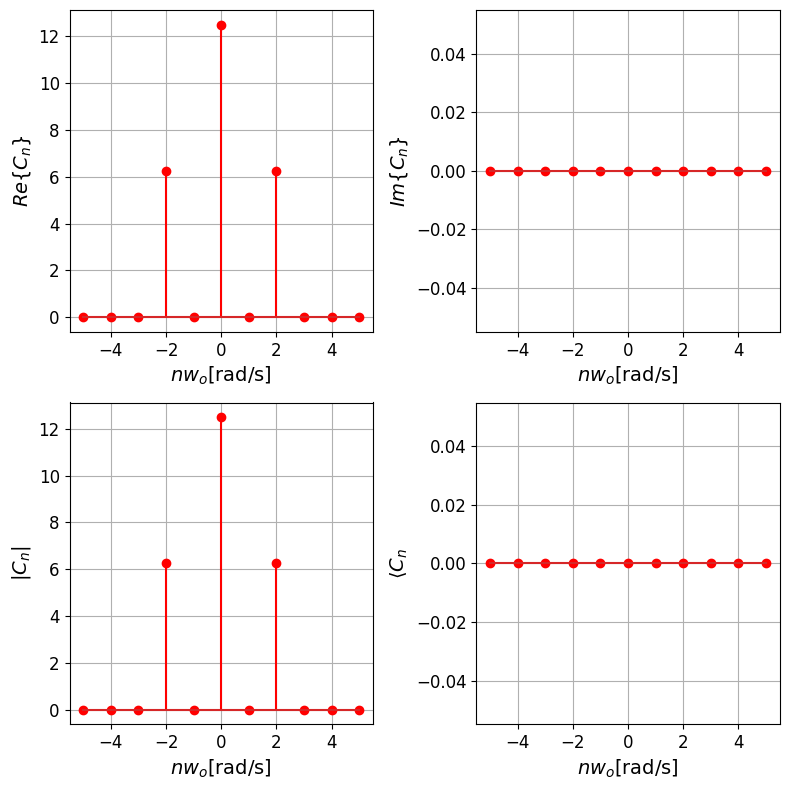

In [ ]:
#Se presenta la simulación del espectro y la reconstrucción

#Construir bases serie exponencial
N = 5 #Número de armónicos
wo = 2*np.pi/T # frecuencia fundamental

# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

#espectro de la señal - serie exponencial
#calcular espectro -> cambiar según la señal estudiada
Cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn[N] = (A**2)/2 # nivel dc C_0
Cn[N-2] = (A**2)/4 # nivel armónico
Cn[N+2] = (A**2)/4

#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

Para calcular el error relativo, necesitamos la potencia:


$$e_r[\%] = \frac{\bar{P}_e}{\bar{P_x}} *100[\%] = \left(1-\frac{\sum^N_{n=-N}|c_n|^2P_n}{\bar{P}_x}\right)*100[\%]$$

En este caso, la potencia de $x(t)$ se cálcula como:

\begin{equation}
P_x = \frac{1}{\frac{1}{F_0}}\int\limits_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}}{|x(t)^2|dt} = \frac{1}{\frac{1}{F_0}}\int\limits_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}}{|\frac{A^2}{2}+\frac{A^2}{2}j\cos(2{\omega_0t})|^2dt}= \frac{A^2F_0}{4}\left(\int\limits_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}}dt + \int\limits_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}}2*\cos(2{\omega_0t})dt + \int\limits_{-\frac{1}{2F_0}}^{\frac{1}{2F_0}}\cos^2(2{\omega_0t})dt\right)
\end{equation}

Resolviendo la ecuación:

$$\boxed{P_x= \frac{3A^4}{8}}$$

Para el caso de la serie exponencial de Fourier $P_n=1$, entonces:

\begin{equation}
E_r[\%] = 1 - \left(\frac{1}{P_x}\sum\limits_{n=-N}^N{|c_n|^2}\right)
\end{equation}

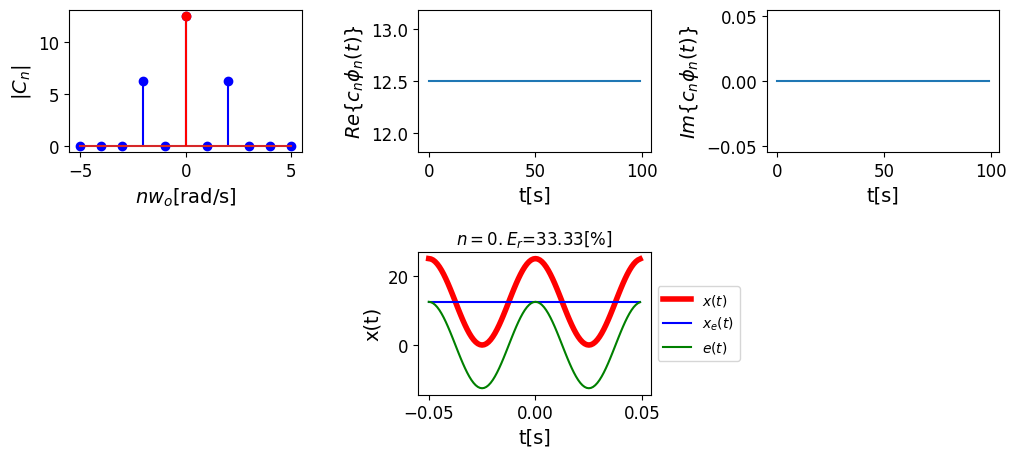

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

#reconstrucción
Px = (3*A**4)/(8)
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(Cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$nw_o$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

    #componentes espectrales
    ce = phin[:,ind].dot(np.diag(Cn[ind]) )
    ax[0,1].plot(np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0,2].plot(np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')

    #reconstruccion
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    #error en t
    et = xo - xe

    ax[1,1].plot(tv,xo,'r',linewidth=4,label='$x(t)$')
    ax[1,1].plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='g',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$n=%d. E_r$=%.2f[%%]' % (n,100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.show()

    #desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')

anim

##**Segundo punto:**

Sea la señal portadora $c(t) = Ac \sin (2πFct)$, con Ac, Fc ∈ R, y la señal mensaje m(t) ∈ R. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), $y(t) = (1 + \frac{m(t)}{Ac})c(t)$. Luego, descargue desde youtube 5 segundos de su cancionfavorita (capturando del segundo 20 al 25). Presente una simulacion de modulacion por amplitud AM (tomando como mensaje el fragmento de la cancion escogida). Grafique las señales en tiempo y frecuencia (magnitud y fase) de la señal mensaje, portadora
y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y señal modulada. Nota: se sugiere utilizar un canal de
señal de audio para el desarrollo del ejercicio. El usuario debe poder escoger el ındice de modulacion deseado.

###**Solucion:**

T.F de la funcion modulada:

$$y(ω)= 𝓕\{y(t)\}=𝓕\{(1+\frac{m(t)}{A_c})c(t)\}=𝓕\{c(t)\}+\frac{1}{A_c}𝓕\{m(t)c(t)\}$$

segun tablas de fourier:

$$c(ω)= 𝓕\{c(t)\}=𝓕\{A_csin(2πF_ct)\}=A_c𝓕 \{\frac{e^{2πF_ct}-e^{-2πF_ct}}{2j}\}$$

Entonces:

$$𝓕\{e^{\pm jω_0t}\}=2πδ(ω\mpω_0)$$

Ahora:

$$c(ω)=\frac{A_cπ}{j}(δ(ω-2πF_c)-δ(ω-2πF_c))$$

De manera similar:

$$\frac{1}{A_c}𝓕\{m(t)c(t)\}=\frac{1}{A_c}𝓕\{A_csin(2πF_ct)\}=𝓕\{m(t)sin(2πF_ct)\}=𝓕\{\frac{m(t)e^{2πF_ct}-m(t)e^{-2πF_ct}}{2j}\}$$

Teniendo en cuenta lo siguiente:

$$𝓕\{x(t)e^{\pm jω_0t}\}=X(ω\mpω_0)$$

Podemos decir que:

$$\frac{1}{A_c}𝓕\{m(t)c(t)\}=\frac{1}{2j}(M(ω-2πF_c)-M(ω-2πF_c))$$

El resultado final del espectro de nuestra señal mudulada sera:

$$\boxed{Y(ω)=\frac{A_cπ}{j}(δ(ω-2πF_c)-δ(ω-2πF_c))+\frac{1}{2j}(M(ω-2πF_c)-M(ω-2πF_c))}$$

In [ ]:
#instalamos api youtube
! pip install -U yt-dlp
#descargamos la cancion que deseamos
link="https://youtu.be/CHXzLUzzW5c?si=x_LBzkVG2dhFTuPZ"
! yt-dlp --extract-audio -o "audio.%(mp3)s" --audio-format mp3  {link}

[youtube] Extracting URL: https://youtu.be/CHXzLUzzW5c?si=x_LBzkVG2dhFTuPZ
[youtube] CHXzLUzzW5c: Downloading webpage
[youtube] CHXzLUzzW5c: Downloading tv client config
[youtube] CHXzLUzzW5c: Downloading player f3d47b5a
[youtube] CHXzLUzzW5c: Downloading tv player API JSON
[youtube] CHXzLUzzW5c: Downloading ios player API JSON
[youtube] CHXzLUzzW5c: Downloading m3u8 information
[info] CHXzLUzzW5c: Downloading 1 format(s): 251
[download] audio.NA.mp3 has already been downloaded
[ExtractAudio] Not converting audio audio.NA.mp3; file is already in target format mp3


In [ ]:
#convertir a .wav con ffmpeg para extraer audio en python
!ffmpeg -i audio.NA.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
#instalar soundfile para cargar .wav
!pip install soundfile

In [ ]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#leer archivo wav
nombre_out = "output.wav"
xa, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 44100.00[Hz]
audio output.wav


In [ ]:
xpro = xa.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [ ]:
#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

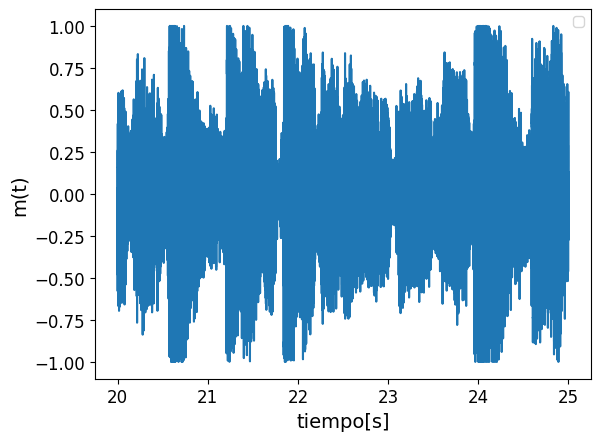

In [ ]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('m(t)')
plt.legend()
plt.show()

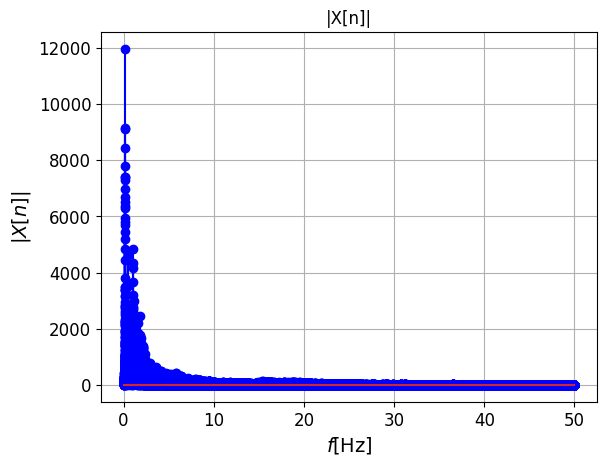

In [ ]:
Xw = np.fft.rfft(m) #cálculo FFT
plt.stem(vf,abs(Xw),'b')
plt.title(r'|X[n]|')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

In [ ]:
Fc = 15000 #frecuencia portadora
Im = 0.5 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*tt) #portadora

In [ ]:
#repoducir portadora
Audio(c,rate=fs)

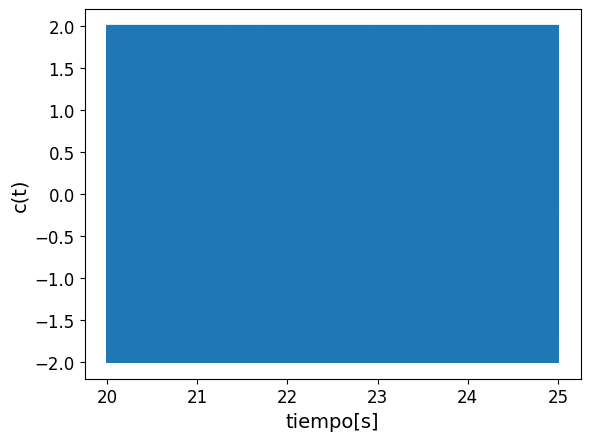

In [ ]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('c(t)')
plt.show()

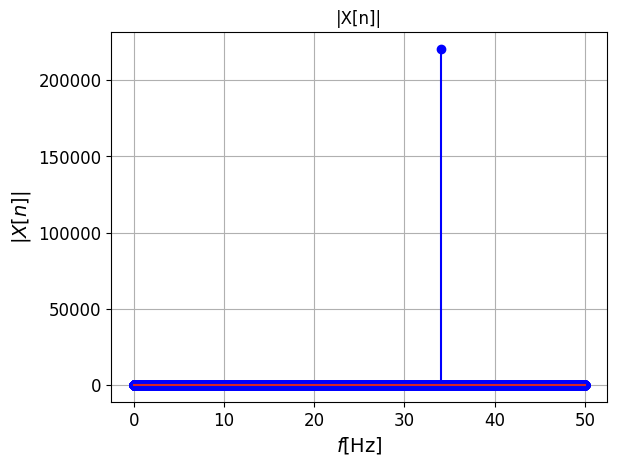

In [ ]:
Xw = np.fft.rfft(c) #cálculo FFT
plt.stem(vf,abs(Xw),'b')
plt.title(r'|X[n]|')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

In [ ]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

In [ ]:
#repoducir modulada
Audio(y,rate=fs)

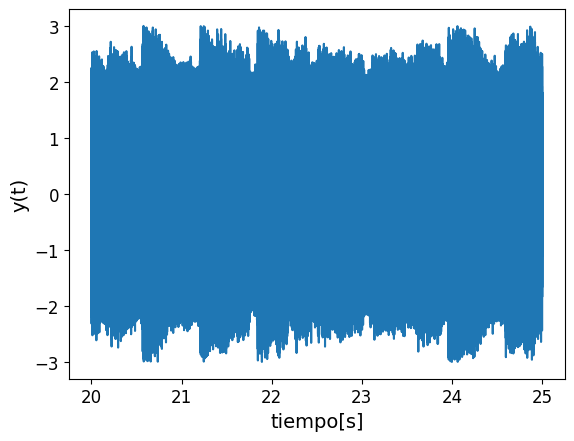

In [ ]:
plt.plot(tt,y) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('y(t)')
plt.show()

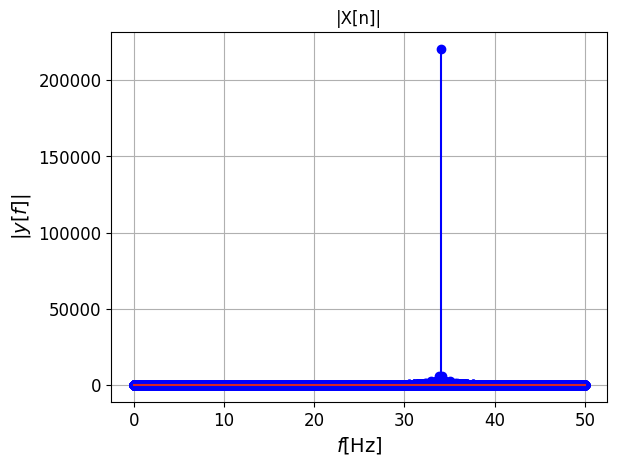

In [ ]:
Xw = np.fft.rfft(y) #cálculo FFT
plt.stem(vf,abs(Xw),'b')
plt.title(r'|X[n]|')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|y[f]|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

##**Tercer punto:**

Consulte en que consiste la distorsion total de armonicos (Total Harmonic Distortion-(THD)) y el factor de potencia en un circuito
electrico. Como puede calcularse el THD desde la FFT?. Como puede calcularse la distorsion del factor de potencia con base al THD?. Genere un ejemplo ilustrativo para el calculo del THD y la distorsion del factor de potencia para un rectificador de onda completa con carga: i) netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias para las simulaciones. El
usuario podra escoger diferentes valores de R y C. Discuta los resultados obtenidos.

##**Solucion:**

La distorsión Total Armónica (THD) Mide la cantidad de armónicos en una señal con respecto a su componente fundamental. Una THD alta indica una señal distorsionada, lo que puede causar interferencias y reducir la eficiencia en sistemas eléctricos.

El factor de Potencia (FP) Indica la eficiencia con la que una carga eléctrica convierte la energía en trabajo útil. Un FP bajo significa más pérdidas y mayor consumo de energía reactiva.

Una alta THD reduce el FP, afectando la calidad de la energía y aumentando el consumo y las pérdidas. Se pueden usar filtros y compensadores para mejorar ambos parámetros.

$$THD=\frac{\sqrt{\sum_{n=2}^{N} V_n^2}}{V_1}\times 100\%$$

V1 es la amplitud del componente fundamental (primera armónica).

𝑉𝑛 son las amplitudes de los armónicos (segundo, tercero, etc.).

𝑁 es el número de armónicos considerados.

Para btener la señal en el dominio del tiempo se registrar la señal eléctrica con un osciloscopio o sistema de adquisición de datos.

Aplicamos la FFT: Transformar la señal al dominio de la frecuencia para obtener el espectro de magnitudes.

Ubicamos los picos en las frecuencias 𝑓1 (fundamental), 2𝑓1, 3𝑓1, etc.

Calcular la THD: Se utiliza la ecuación para hallar la relación entre los armónicos y la fundamental.

Como conclusión tenemos que la presencia de armónicos en circuitos de corriente alterna reduce la eficiencia energética, y el análisis del THD y su impacto en el factor de potencia es crucial para diseñar sistemas eléctricos eficientes.

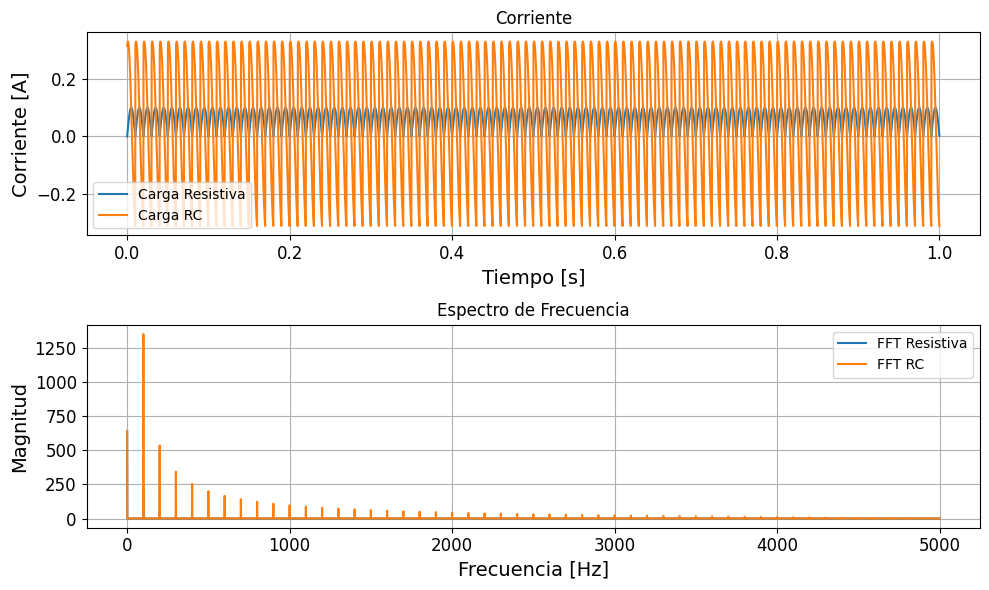

THD (Carga Resistiva): 34.20%
Factor de Potencia (Carga Resistiva): 0.95
THD (Carga RC): 246.52%
Factor de Potencia (Carga RC): 0.30


In [ ]:
# Parámetros
Fs = 10000  # Frecuencia de muestreo (Hz)
f = 50      # Frecuencia fundamental (Hz)
R = 10      # Resistencia (ohmios)
C = 1e-3    # Capacitancia (faradios)
t = np.linspace(0, 1, Fs, endpoint=False)  # Tiempo de simulación

# Onda rectificada (fundamental + armónicos)
v_in = np.abs(np.sin(2 * np.pi * f * t))  # Voltaje rectificado

# Corriente para carga resistiva
i_res = v_in / R

# Corriente para carga RC
i_rc = np.gradient(v_in, t[1]) / (1 / C) + v_in / R  # Aproximación por derivada

# FFT de las señales
def compute_fft(signal, Fs):
    N = len(signal)
    Xf = np.fft.fft(signal)
    freqs = np.fft.fftfreq(N, 1 / Fs)
    Xf = Xf[:N // 2]
    freqs = freqs[:N // 2]
    return freqs, np.abs(Xf)

freqs, Xf_res = compute_fft(i_res, Fs)
freqs, Xf_rc = compute_fft(i_rc, Fs)

# Cálculo del THD
def compute_thd(Xf):
    fundamental = Xf[0]
    harmonics = np.sqrt(np.sum(Xf[1:]**2))
    return harmonics / fundamental

thd_res = compute_thd(Xf_res)
thd_rc = compute_thd(Xf_rc)

# Factor de potencia
pf_res = 1 / np.sqrt(1 + thd_res**2)  # Resistiva: cos(phi) = 1
pf_rc = 0.8 / np.sqrt(1 + thd_rc**2)  # Aproximación con cos(phi) = 0.8

# Gráficos
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, i_res, label="Carga Resistiva")
plt.plot(t, i_rc, label="Carga RC")
plt.title("Corriente")
plt.xlabel("Tiempo [s]")
plt.ylabel("Corriente [A]")
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(freqs, Xf_res, label="FFT Resistiva")
plt.plot(freqs, Xf_rc, label="FFT RC")
plt.title("Espectro de Frecuencia")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Resultados
print(f"THD (Carga Resistiva): {thd_res*100:.2f}%")
print(f"Factor de Potencia (Carga Resistiva): {pf_res:.2f}")
print(f"THD (Carga RC): {thd_rc*100:.2f}%")
print(f"Factor de Potencia (Carga RC): {pf_rc:.2f}")
